#### SEIR model for 2019-nCov prediciton

SEIR model code:        
from class_SEIR.py           

choose three packages of initial parameters:  
1. 2019-12-08    
2. 2020-01-01
3. 2020-01-15    
     
parameter optimization: Hyperopt
    loss function: MSE 
    data for test: 2020-01-28 to 2020-01-31, with linear over-sampling 

In [1]:
import pandas as pd
import numpy as np
import warnings 
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
warnings.filterwarnings('ignore')
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import seaborn as sns 
sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (12.0, 8.0)
sns.mpl.rcParams['savefig.dpi'] = 90
sns.mpl.rcParams['font.family'] = 'sans-serif'
sns.mpl.rcParams['font.size'] = 14

In [3]:
# load data 
data=pd.read_hdf('data.h5')
data_new=pd.read_hdf('data_new.h5')

In [4]:
data.head(3)
data_new.head(3)

,确诊,治愈,死亡,疑似
2020-01-15,41,12,2,NaN
2020-01-16,45,15,2,NaN
2020-01-17,62,19,2,NaN


,确诊,治愈,死亡,疑似
2020-01-01,27,NaN,NaN,NaN
2020-01-02,27,NaN,NaN,NaN
2020-01-03,27,NaN,NaN,NaN


<Figure size 720x432 with 0 Axes>

Text(0.5, 1.0, '2019-nCov')

Text(0.5, 0, 'date')

Text(0, 0.5, 'number')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 <a list of 17 Text xticklabel objects>)

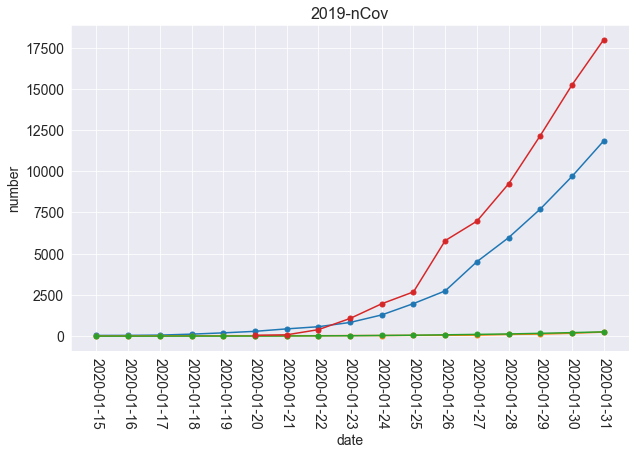

In [5]:
# visualize data 
import pylab as pl
plt.figure(figsize=(10, 6))
plt.plot(data,marker='o',markersize=5)
plt.title('2019-nCov',fontsize=16)
plt.xlabel('date',fontsize=14)
plt.ylabel('number',fontsize=14)
pl.xticks(rotation=270)

In [6]:
# pre_results visualize 
def pre_visualize_global(dataset,pre):
    # test data
    test=dataset.iloc[:,0]
    
    # index date 
    date_index = pd.date_range(start=test.index[0], periods=len(pre)).tolist()
    date_index = np.array([time.date() for time in date_index],dtype='str')
    # pre
    pre=pd.Series(pre)
    pre.index=date_index
    
    plt.plot(pre,marker='o',markersize=5)
    plt.plot(test,marker='+',markersize=6)
    plt.title('2019-nCov',fontsize=16)
    plt.xlabel('date',fontsize=14)
    plt.ylabel('number',fontsize=14)
    
    import pylab as pl
    pl.xticks(range(0,pre.shape[0],5),rotation=270) # xlabel 旋转270°，每5个显示一次
    
    return [['the peak of prediction',pre.idxmax()],['max infected number',pre.max()]]

In [7]:
def pre_visualize_local(dataset,pre,start_date,end_date):
    # test data
    test=dataset.iloc[:,0]
    
    # index date 
    date_index = pd.date_range(start=test.index[0], periods=len(pre)).tolist()
    date_index = np.array([time.date() for time in date_index],dtype='str')
    # pre
    pre=pd.Series(pre)
    pre.index=date_index
    
    # local data
    pre_local=pre[(pre.index>=start_date)&(pre.index<=end_date)]
    test_local=test[(test.index>=start_date)&(test.index<=end_date)]
    
    plt.plot(pre_local,marker='o',markersize=5)
    plt.plot(test_local,marker='+',markersize=6)
    plt.title('2019-nCov prediction local data',fontsize=16)
    plt.xlabel('date',fontsize=14)
    plt.ylabel('number',fontsize=14)
    
    import pylab as pl
    pl.xticks(rotation=270) # xlabel 旋转270°，每5个显示一次

In [8]:
from class_SEIR import *

In [9]:
fixed_param={
    'gamma':0.025,
    'init_S':100000,
    'init_E':50,
    'init_R':0,
    'init_I':27
}
seir_param_opt_class=seir_param_opt(data_new,fixed_param)
a,trials=seir_param_opt_class.seir_hp()

100%|██████████████████████████████████████████████| 500/500 [00:21<00:00, 14.69trial/s, best loss: 1128656.4095308217]


In [10]:
param={**a,**fixed_param}
seir_model_class=seir_model(data_new,param)
results=seir_model_class.seir_model_pre()
pre_I=results[2]

[['the peak of prediction', '2020-02-22'],
 ['max infected number', 66294.35603354608]]

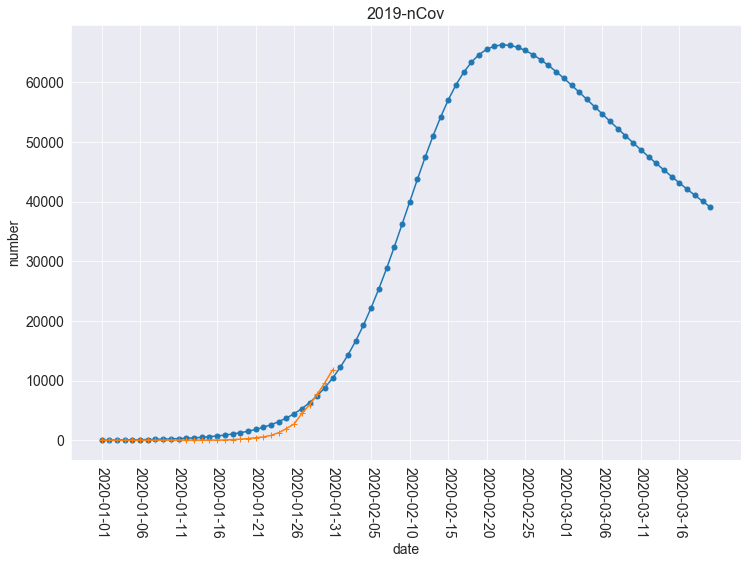

In [12]:
# global visualize
pre_visualize_global(data_new,pre_I)

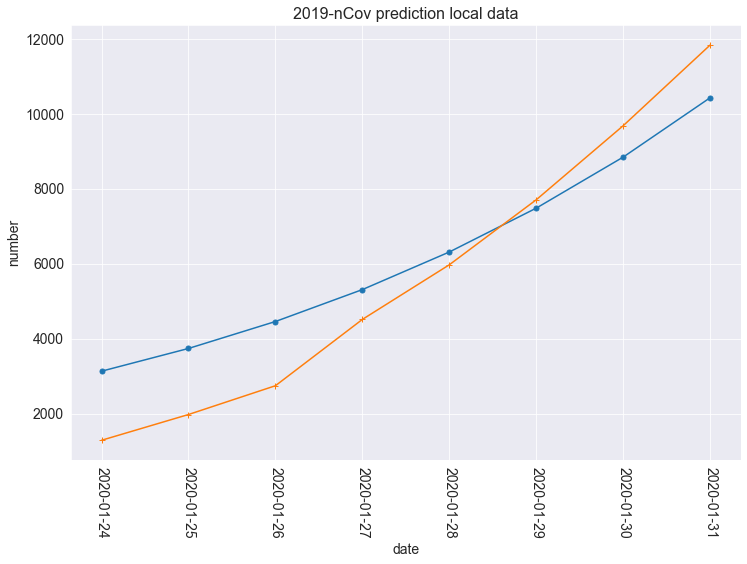

In [13]:
# local visualize
pre_visualize_local(data_new,pre_I,start_date='2020-01-24',end_date='2020-01-31')

In [21]:
fixed_param={
    'gamma':0.025,
    'init_S':100000,
    'init_E':1000,
    'init_R':0,
    'init_I':44
}
seir_param_opt_class=seir_param_opt(data,fixed_param)
b,trials=seir_param_opt_class.seir_hp()

100%|██████████████████████████████████████████████| 500/500 [00:17<00:00, 28.56trial/s, best loss: 1035250.1186690798]


In [22]:
param={**b,**fixed_param}
seir_model_class=seir_model(data,param)
results=seir_model_class.seir_model_pre()
pre_I=results[2]

[['the peak of prediction', '2020-02-22'],
 ['max infected number', 67439.04751094613]]

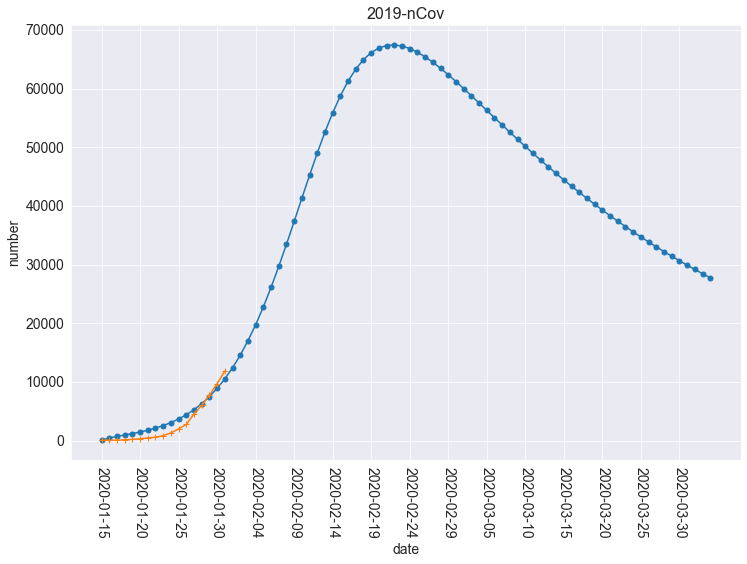

In [23]:
# global visualize
pre_visualize_global(data,pre_I)

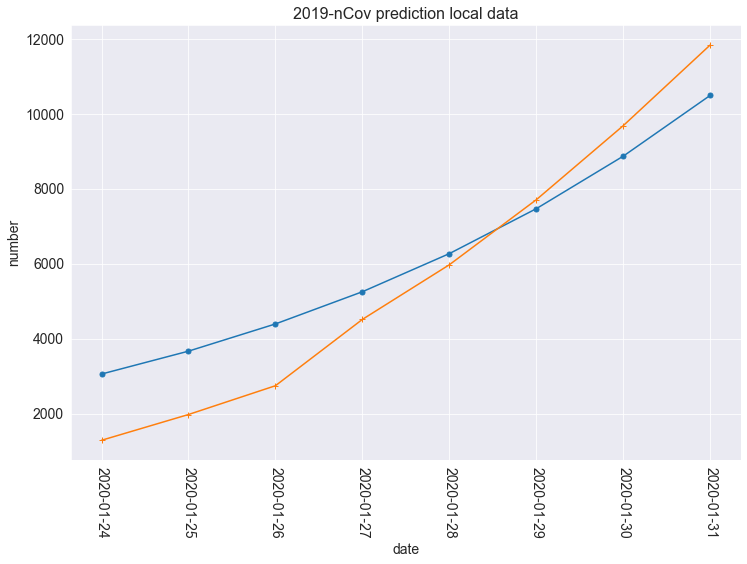

In [24]:
# local visualize
pre_visualize_local(data,pre_I,start_date='2020-01-24',end_date='2020-01-31')

In [25]:
# data_init 
## begin from 2019-12-31

In [26]:
data_init=pd.read_hdf('data_init.h5')
data_init.head(3)

In [27]:
fixed_param={
    'gamma':0.02,
    'init_S':100000,
    'init_E':3,
    'init_R':0,
    'init_I':1
}
seir_param_opt_class=seir_param_opt(data_init,fixed_param)
best_param,trials=seir_param_opt_class.seir_hp()

100%|██████████████████████████████████████████████| 500/500 [00:18<00:00, 19.15trial/s, best loss: 1435974.0471252399]


In [28]:
best_param

{'alpha': 0.31, 'beta': 0.30000000000000004}

In [29]:
param={**best_param,**fixed_param}
seir_model_class=seir_model(data_init,param)
results=seir_model_class.seir_model_pre()
pre_I=results[2]

[['the peak of prediction', '2020-02-25'],
 ['max infected number', 69366.93519742049]]

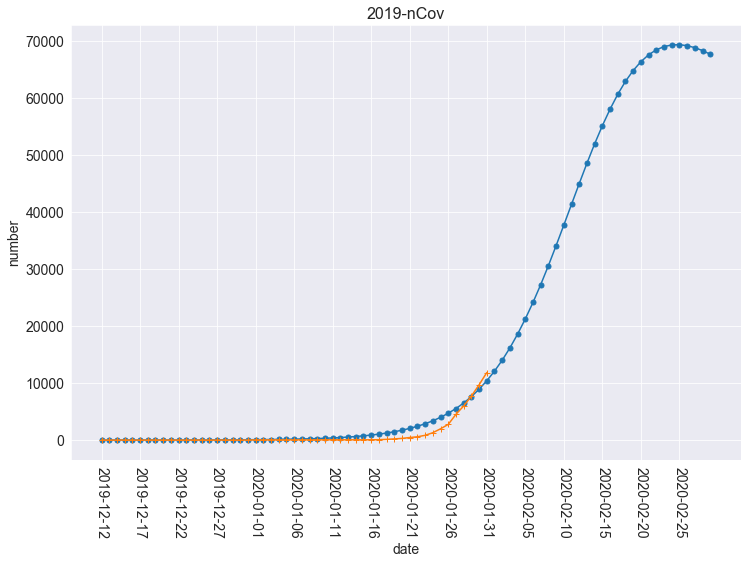

In [30]:
# global visualize
pre_visualize_global(data_init,pre_I)

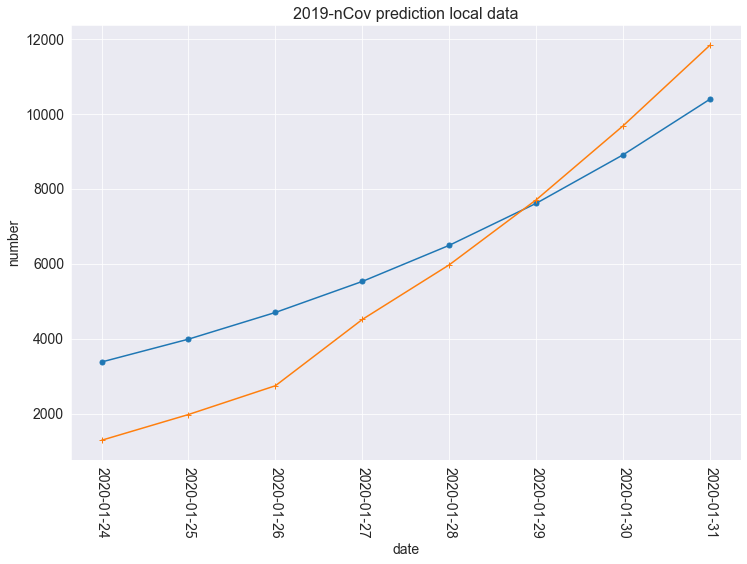

In [33]:
# local visualize
pre_visualize_local(data_init,pre_I,start_date='2020-01-24',end_date='2020-01-31')